# Zillow

The `zillow.csv` file contains several recently sold houses in the Boulder area.  

How well can you predict home sale prices?

In [247]:
import pandas as pd

df = pd.read_csv("zillow.csv", parse_dates=['date_sold'])
df.columns

Index([u'address', u'baths', u'beds', u'city', u'date_sold', u'hoa_fee',
       u'last_sold_price', u'latitude', u'longitude', u'parking', u'price',
       u'property_value', u'rent_high', u'rent_low', u'rent_value', u'sqft',
       u'tax_assessed_value', u'tax_rate', u'type', u'year_built',
       u'zest_high', u'zest_low', u'zest_value', u'zestimate'],
      dtype='object')

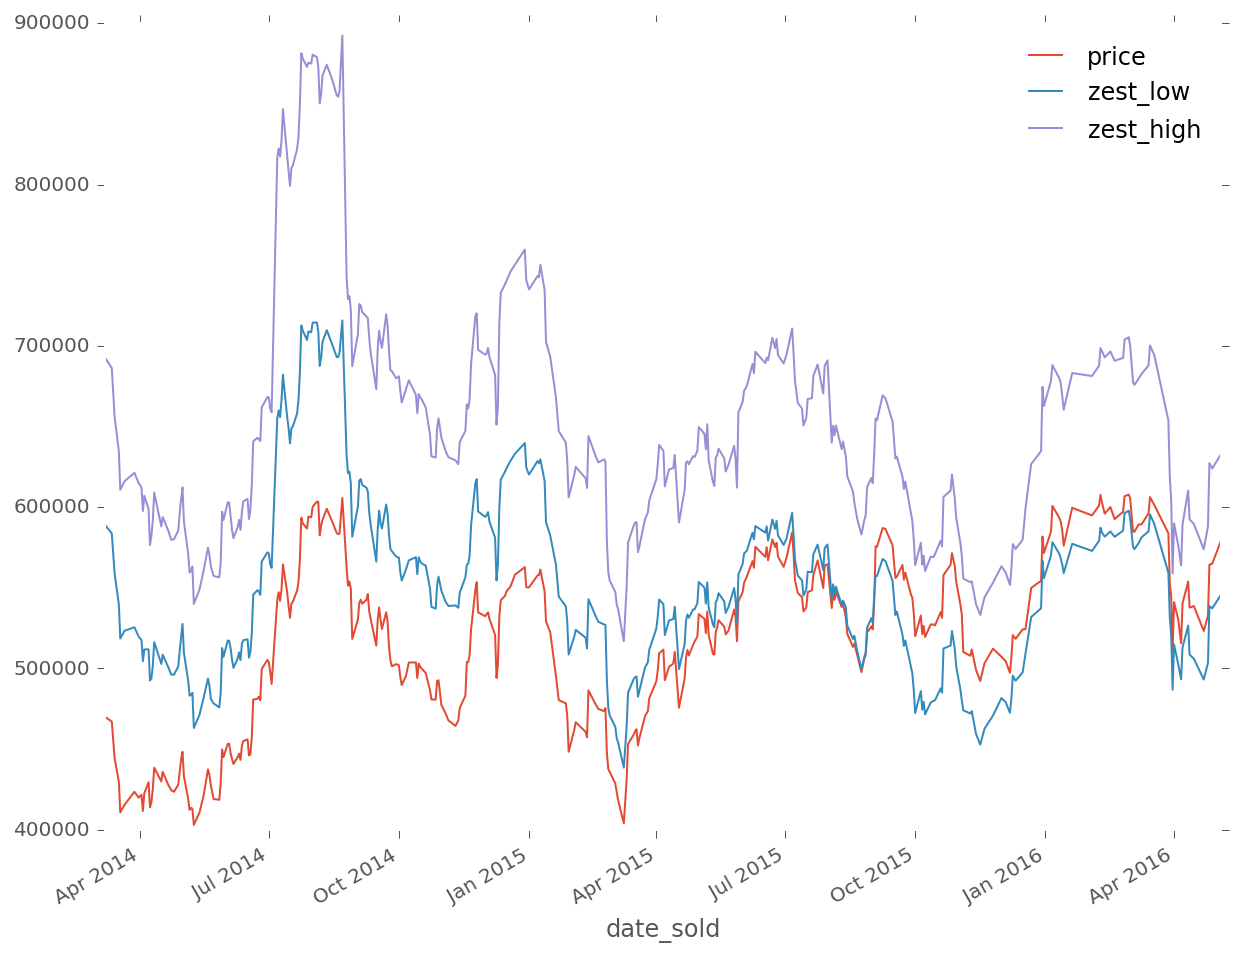

In [257]:
df.dropna(inplace=True)
df.sort_values(by="date_sold", inplace=True)

price = df[['date_sold', 'price']]
zl = df[['date_sold', 'zest_low']]
zh = df[['date_sold', 'zest_high']]

pd.concat([ pd.rolling_mean(price.groupby('date_sold').agg('mean'), window=30).dropna(),
            pd.rolling_mean(zl.groupby('date_sold').agg('mean'), window=30).dropna(),
            pd.rolling_mean(zh.groupby('date_sold').agg('mean'), window=30).dropna(),
          ], axis=1).plot()

Consider a few other models...

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

Maybe these will be useful

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

If you are feeling it...

In [ ]:
from sklearn import cross_validation